<a href="https://colab.research.google.com/github/ApisanJan/bfoa-algorithm/blob/main/%E0%B8%BABFOA_Bee_Firefly_genetic_TSP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Phase 1**

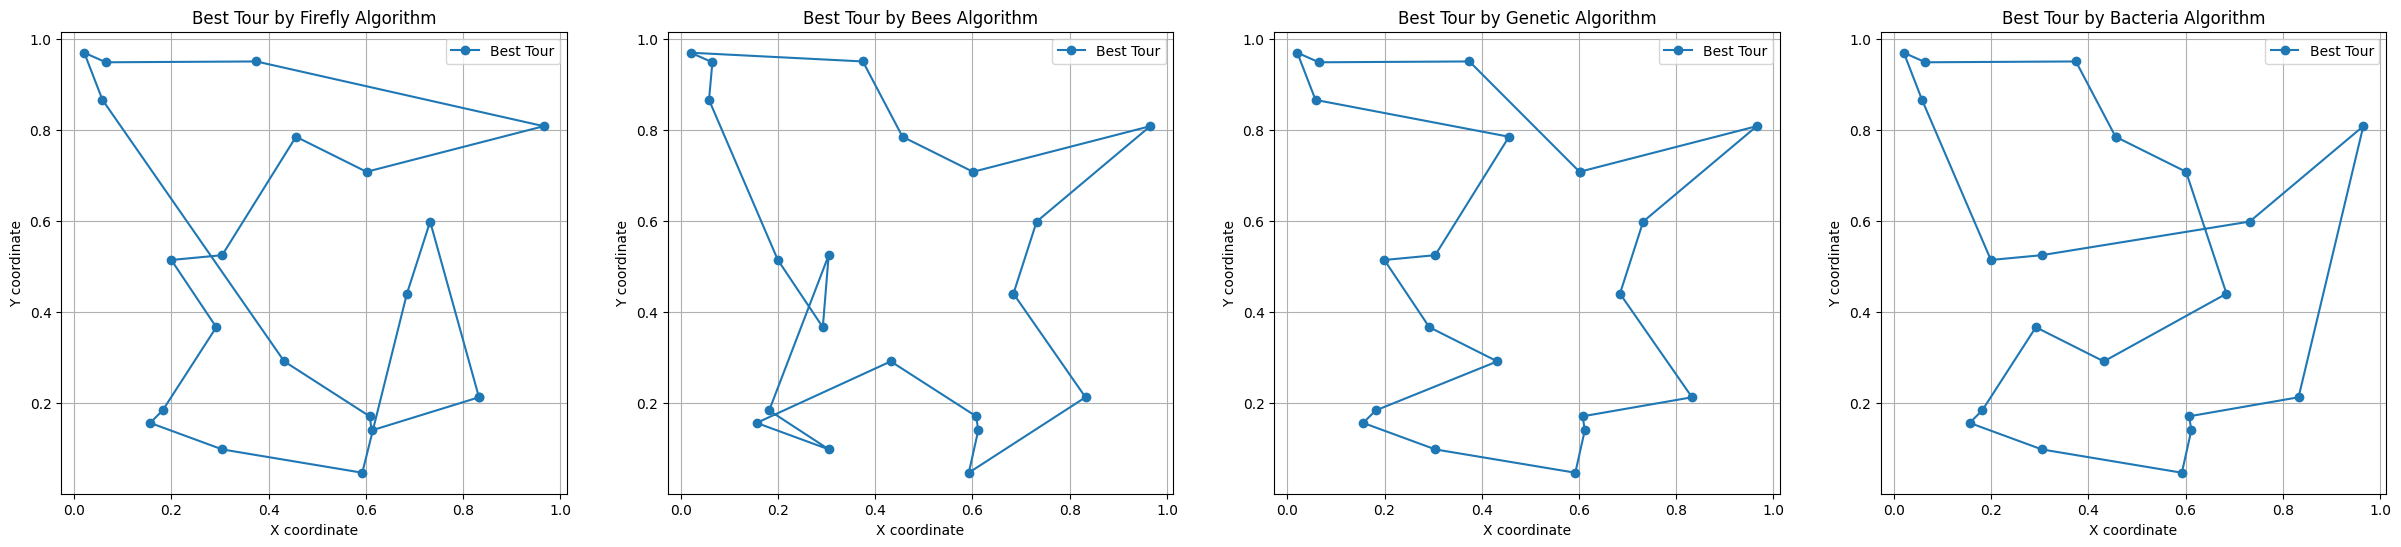

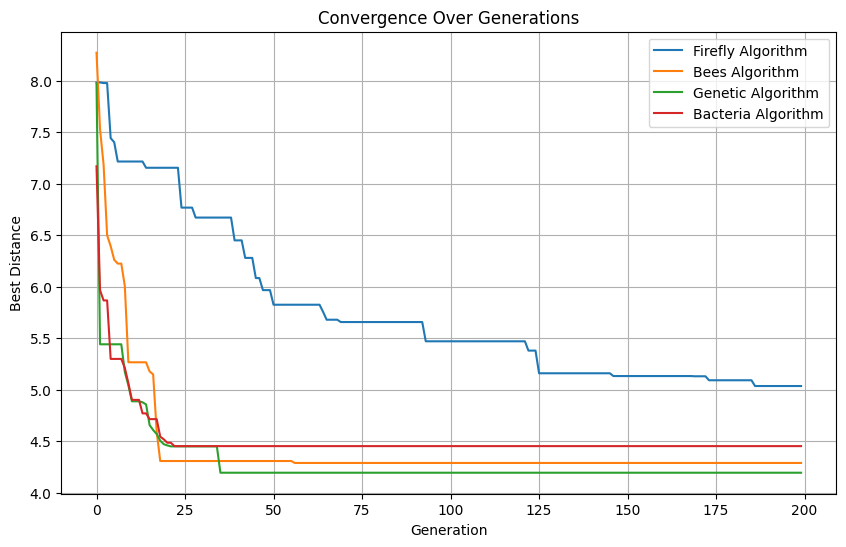

Best distance found by Firefly Algorithm: 5.0350
Best distance found by Bees Algorithm: 4.2880
Best distance found by Genetic Algorithm: 4.1932
Best distance found by Bacteria Algorithm: 4.4516


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Generate 20 random cities
num_cities = 20
np.random.seed(42)  # For reproducibility
cities = np.random.rand(num_cities, 2)

# Parameters for all algorithms
max_generations = 200

# Parameters for Firefly Algorithm
num_fireflies = 200

# Parameters for Bees Algorithm
num_bees = 200
num_elite_sites = 3
num_best_sites = 7
elite_bees = 7
best_bees = 3

# Parameters for Genetic Algorithm
population_size = 200
mutation_rate = 0.02
tournament_size = 5

# Parameters for Bacteria Algorithm
num_bacteria = 200
swim_length = 4
elim_disp_prob = 0.1

# Initialize populations with random tours
fireflies = [np.random.permutation(num_cities) for _ in range(num_fireflies)]
bees = [np.random.permutation(num_cities) for _ in range(num_bees)]
population = [np.random.permutation(num_cities) for _ in range(population_size)]
bacteria = [np.random.permutation(num_cities) for _ in range(num_bacteria)]

def total_distance(tour, cities):
    """Calculate the total distance of the tour."""
    dist = 0
    for i in range(len(tour)):
        city_a = cities[tour[i % len(tour)]]
        city_b = cities[tour[(i + 1) % len(tour)]]
        dist += np.linalg.norm(city_a - city_b)
    return dist

# Bacteria Algorithm Implementation
best_bacteria = None
best_bacteria_distance = np.inf
bacteria_distances_over_time = []

for gen in range(max_generations):
    # Evaluate each bacterium
    distances = np.array([total_distance(bacterium, cities) for bacterium in bacteria])

    # Update the best bacterium
    if distances.min() < best_bacteria_distance:
        best_bacteria_distance = distances.min()
        best_bacteria = bacteria[distances.argmin()].copy()

    bacteria_distances_over_time.append(best_bacteria_distance)

    # Chemotaxis step
    for i in range(num_bacteria):
        for _ in range(swim_length):
            new_tour = bacteria[i].copy()
            idx1, idx2 = np.random.choice(num_cities, size=2, replace=False)
            new_tour[idx1], new_tour[idx2] = new_tour[idx2], new_tour[idx1]
            new_distance = total_distance(new_tour, cities)
            if new_distance < distances[i]:
                bacteria[i] = new_tour
                distances[i] = new_distance

    # Reproduction: Sort bacteria by fitness and replace half of them with the best ones
    indices = np.argsort(distances)
    bacteria = [bacteria[i] for i in indices[:num_bacteria//2]] * 2  # Top half survives and reproduces

    # Elimination-Dispersal step
    for i in range(num_bacteria):
        if np.random.rand() < elim_disp_prob:
            bacteria[i] = np.random.permutation(num_cities)  # Disperse bacterium to a new location

# Firefly Algorithm Implementation
best_firefly = None
best_firefly_distance = np.inf
firefly_distances_over_time = []

for gen in range(max_generations):
    # Compute the total distance (fitness) of each firefly
    distances = np.array([total_distance(firefly, cities) for firefly in fireflies])

    # Sort fireflies by their brightness (lower distance is brighter)
    indices = np.argsort(distances)
    fireflies = [fireflies[i] for i in indices]
    distances = distances[indices]

    # Update the best firefly
    if distances[0] < best_firefly_distance:
        best_firefly_distance = distances[0]
        best_firefly = fireflies[0].copy()

    firefly_distances_over_time.append(best_firefly_distance)

    # Move fireflies
    for i in range(num_fireflies):
        for j in range(num_fireflies):
            if distances[i] > distances[j]:
                # Compute attractiveness beta
                beta0 = 1.0
                gamma = 0.1
                rij = distances[i] - distances[j]
                beta = beta0 * np.exp(-gamma * (rij ** 2))

                # Move firefly i towards j
                diff_indices = np.where(fireflies[i] != fireflies[j])[0]
                num_diffs = len(diff_indices)
                if num_diffs > 0:
                    num_swaps = int(beta * num_diffs)
                    num_swaps = max(1, num_swaps)
                    swap_indices = np.random.choice(diff_indices, size=num_swaps, replace=False)
                    for idx in swap_indices:
                        city_j = fireflies[j][idx]
                        idx_in_i = np.where(fireflies[i] == city_j)[0][0]
                        # Swap positions in firefly i
                        fireflies[i][idx], fireflies[i][idx_in_i] = fireflies[i][idx_in_i], fireflies[i][idx]

    # Apply random mutation
    alpha = 0.01  # Mutation probability
    for i in range(num_fireflies):
        if np.random.rand() < alpha:
            idx1, idx2 = np.random.choice(num_cities, size=2, replace=False)
            fireflies[i][idx1], fireflies[i][idx2] = fireflies[i][idx2], fireflies[i][idx1]

# Bees Algorithm Implementation
best_bee = None
best_bee_distance = np.inf
bee_distances_over_time = []

for gen in range(max_generations):
    # Evaluate the fitness of each bee
    distances = np.array([total_distance(bee, cities) for bee in bees])

    # Sort bees by fitness
    indices = np.argsort(distances)
    bees = [bees[i] for i in indices]
    distances = distances[indices]

    # Update the best bee
    if distances[0] < best_bee_distance:
        best_bee_distance = distances[0]
        best_bee = bees[0].copy()

    bee_distances_over_time.append(best_bee_distance)

    # Recruit bees for elite sites
    new_bees = []
    for i in range(num_elite_sites):
        for _ in range(elite_bees):
            # Local search around the elite site
            new_tour = bees[i].copy()
            idx1, idx2 = np.random.choice(num_cities, size=2, replace=False)
            new_tour[idx1], new_tour[idx2] = new_tour[idx2], new_tour[idx1]
            new_bees.append(new_tour)

    # Recruit bees for best sites
    for i in range(num_elite_sites, num_best_sites):
        for _ in range(best_bees):
            # Local search around the best site
            new_tour = bees[i].copy()
            idx1, idx2 = np.random.choice(num_cities, size=2, replace=False)
            new_tour[idx1], new_tour[idx2] = new_tour[idx2], new_tour[idx1]
            new_bees.append(new_tour)

    # Assign remaining bees to search randomly
    remaining_bees = num_bees - len(new_bees)
    for _ in range(remaining_bees):
        new_bees.append(np.random.permutation(num_cities))

    bees = new_bees.copy()

# Genetic Algorithm Implementation
best_individual = None
best_individual_distance = np.inf
ga_distances_over_time = []

for gen in range(max_generations):
    # Evaluate the fitness of each individual
    distances = np.array([total_distance(individual, cities) for individual in population])

    # Update the best individual
    min_distance = distances.min()
    if min_distance < best_individual_distance:
        best_individual_distance = min_distance
        best_individual = population[distances.argmin()].copy()

    ga_distances_over_time.append(best_individual_distance)

    # Selection (Tournament Selection)
    selected = []
    for _ in range(population_size):
        indices = np.random.choice(len(population), tournament_size, replace=False)
        participants = [population[i] for i in indices]
        participant_distances = [total_distance(ind, cities) for ind in participants]
        winner = participants[np.argmin(participant_distances)]
        selected.append(winner)

    # Crossover (Order Crossover)
    offspring = []
    for i in range(0, population_size, 2):
        parent1 = selected[i]
        parent2 = selected[(i + 1) % population_size]
        cut1, cut2 = sorted(np.random.choice(num_cities, 2, replace=False))
        child1 = np.full(num_cities, -1)
        child2 = np.full(num_cities, -1)
        # Copy slice from parent to child
        child1[cut1:cut2] = parent1[cut1:cut2]
        child2[cut1:cut2] = parent2[cut1:cut2]
        # Fill remaining positions with the other parent's genes
        def fill_child(child, parent):
            fill_pos = [gene for gene in parent if gene not in child]
            idx = np.where(child == -1)[0]
            child[idx] = fill_pos
            return child
        child1 = fill_child(child1, parent2)
        child2 = fill_child(child2, parent1)
        offspring.append(child1)
        offspring.append(child2)

    # Mutation (Swap Mutation)
    for individual in offspring:
        if np.random.rand() < mutation_rate:
            idx1, idx2 = np.random.choice(num_cities, 2, replace=False)
            individual[idx1], individual[idx2] = individual[idx2], individual[idx1]

    # Update population
    population = offspring.copy()

# Plot the best tours
fig, axs = plt.subplots(1, 4, figsize=(30, 6))

# Firefly Algorithm Result
if best_firefly is not None:
    best_tour = best_firefly
    x = cities[best_tour, 0]
    y = cities[best_tour, 1]
    x = np.append(x, x[0])  # Ensure loop by appending start city
    y = np.append(y, y[0])
    axs[0].plot(x, y, 'o-', label='Best Tour')
    axs[0].set_title('Best Tour by Firefly Algorithm')
    axs[0].set_xlabel('X coordinate')
    axs[0].set_ylabel('Y coordinate')
    axs[0].legend()
    axs[0].grid(True)

# Bees Algorithm Result
if best_bee is not None:
    best_tour = best_bee
    x = cities[best_tour, 0]
    y = cities[best_tour, 1]
    x = np.append(x, x[0])
    y = np.append(y, y[0])
    axs[1].plot(x, y, 'o-', label='Best Tour')
    axs[1].set_title('Best Tour by Bees Algorithm')
    axs[1].set_xlabel('X coordinate')
    axs[1].set_ylabel('Y coordinate')
    axs[1].legend()
    axs[1].grid(True)

# Genetic Algorithm Result
if best_individual is not None:
    best_tour = best_individual.astype(int)
    x = cities[best_tour, 0]
    y = cities[best_tour, 1]
    x = np.append(x, x[0])
    y = np.append(y, y[0])
    axs[2].plot(x, y, 'o-', label='Best Tour')
    axs[2].set_title('Best Tour by Genetic Algorithm')
    axs[2].set_xlabel('X coordinate')
    axs[2].set_ylabel('Y coordinate')
    axs[2].legend()
    axs[2].grid(True)

# Bacteria Algorithm Result
if best_bacteria is not None:
    best_tour = best_bacteria
    x = cities[best_tour, 0]
    y = cities[best_tour, 1]
    x = np.append(x, x[0])
    y = np.append(y, y[0])
    axs[3].plot(x, y, 'o-', label='Best Tour')
    axs[3].set_title('Best Tour by Bacteria Algorithm')
    axs[3].set_xlabel('X coordinate')
    axs[3].set_ylabel('Y coordinate')
    axs[3].legend()
    axs[3].grid(True)

plt.show()

# Plot convergence curves
plt.figure(figsize=(10,6))
if firefly_distances_over_time:
    plt.plot(range(len(firefly_distances_over_time)), firefly_distances_over_time, label='Firefly Algorithm')
if bee_distances_over_time:
    plt.plot(range(len(bee_distances_over_time)), bee_distances_over_time, label='Bees Algorithm')
if ga_distances_over_time:
    plt.plot(range(len(ga_distances_over_time)), ga_distances_over_time, label='Genetic Algorithm')
if bacteria_distances_over_time:
    plt.plot(range(len(bacteria_distances_over_time)), bacteria_distances_over_time, label='Bacteria Algorithm')
plt.title('Convergence Over Generations')
plt.xlabel('Generation')
plt.ylabel('Best Distance')
plt.legend()
plt.grid(True)
plt.show()

print(f"Best distance found by Firefly Algorithm: {best_firefly_distance:.4f}")
print(f"Best distance found by Bees Algorithm: {best_bee_distance:.4f}")
print(f"Best distance found by Genetic Algorithm: {best_individual_distance:.4f}")
print(f"Best distance found by Bacteria Algorithm: {best_bacteria_distance:.4f}")

# **Phase 2**

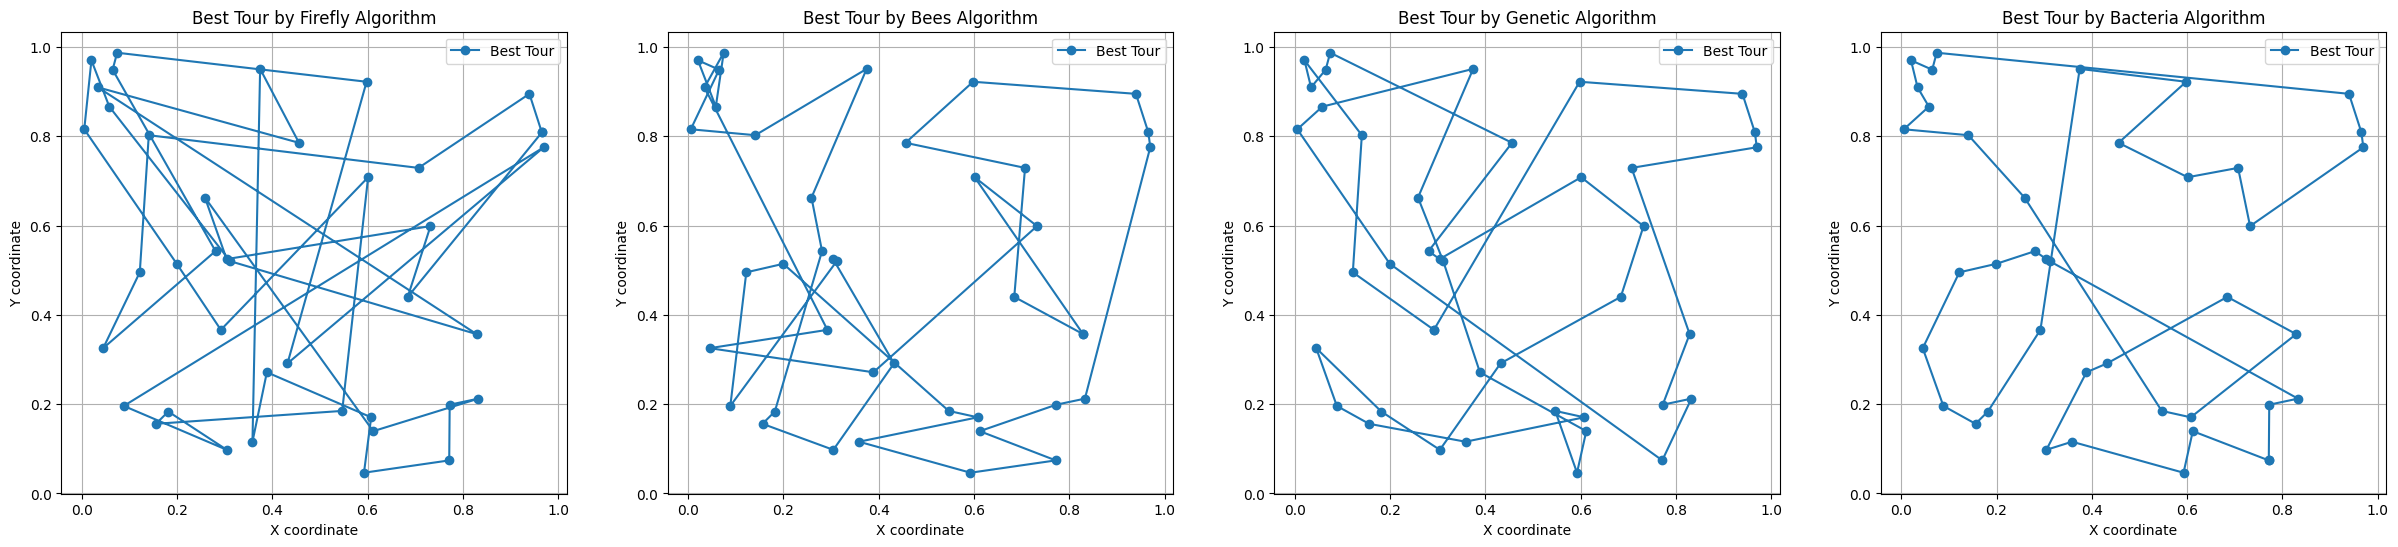

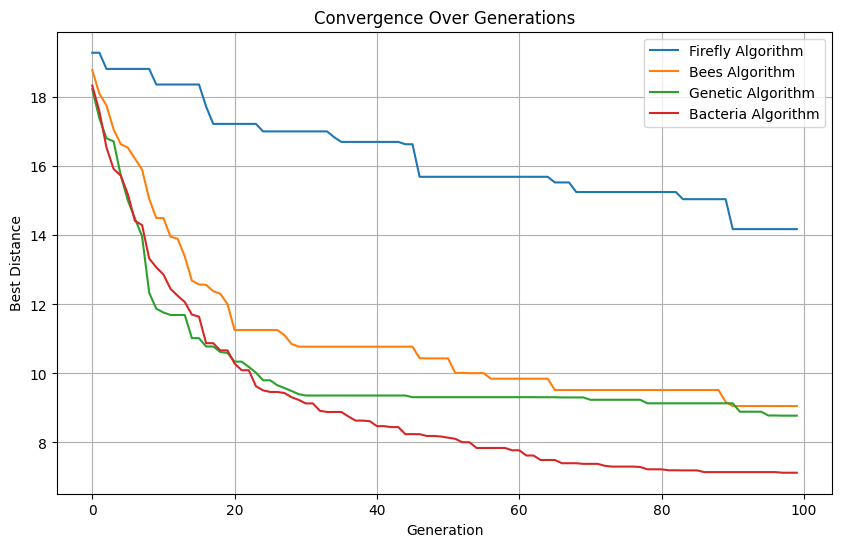

Best distance found by Firefly Algorithm: 14.1805
Best distance found by Bees Algorithm: 9.0561
Best distance found by Genetic Algorithm: 8.7772
Best distance found by Bacteria Algorithm: 7.1244


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import multiprocessing
from functools import partial

def total_distance(tour, cities):
    """Calculate the total distance of the tour."""
    dist = 0
    for i in range(len(tour)):
        city_a = cities[tour[i % len(tour)]]
        city_b = cities[tour[(i + 1) % len(tour)]]
        dist += np.linalg.norm(city_a - city_b)
    return dist

def evaluate_population(population, cities):
    """Evaluate the fitness of each individual in the population using multiprocessing."""
    with multiprocessing.Pool() as pool:
        distances = pool.map(partial(total_distance, cities=cities), population)
    return np.array(distances)

def firefly_algorithm(cities, num_fireflies=50, max_generations=100):
    """Firefly Algorithm implementation with multiprocessing."""
    num_cities = len(cities)
    fireflies = [np.random.permutation(num_cities) for _ in range(num_fireflies)]
    best_firefly = None
    best_firefly_distance = np.inf
    firefly_distances_over_time = []

    for gen in range(max_generations):
        # Compute the total distance (fitness) of each firefly
        distances = evaluate_population(fireflies, cities)

        # Sort fireflies by their brightness (lower distance is brighter)
        indices = np.argsort(distances)
        fireflies = [fireflies[i] for i in indices]
        distances = distances[indices]

        # Update the best firefly
        if distances[0] < best_firefly_distance:
            best_firefly_distance = distances[0]
            best_firefly = fireflies[0].copy()

        firefly_distances_over_time.append(best_firefly_distance)

        # Move fireflies
        for i in range(num_fireflies):
            for j in range(num_fireflies):
                if distances[i] > distances[j]:
                    # Compute attractiveness beta
                    beta0 = 1.0
                    gamma = 0.1
                    rij = distances[i] - distances[j]
                    beta = beta0 * np.exp(-gamma * (rij ** 2))

                    # Move firefly i towards j
                    diff_indices = np.where(fireflies[i] != fireflies[j])[0]
                    num_diffs = len(diff_indices)
                    if num_diffs > 0:
                        num_swaps = int(beta * num_diffs)
                        num_swaps = max(1, num_swaps)
                        swap_indices = np.random.choice(diff_indices, size=num_swaps, replace=False)
                        for idx in swap_indices:
                            city_j = fireflies[j][idx]
                            idx_in_i = np.where(fireflies[i] == city_j)[0][0]
                            fireflies[i][idx], fireflies[i][idx_in_i] = fireflies[i][idx_in_i], fireflies[i][idx]

        # Apply random mutation
        alpha = 0.01  # Mutation probability
        for i in range(num_fireflies):
            if np.random.rand() < alpha:
                idx1, idx2 = np.random.choice(num_cities, size=2, replace=False)
                fireflies[i][idx1], fireflies[i][idx2] = fireflies[i][idx2], fireflies[i][idx1]

    return best_firefly, best_firefly_distance, firefly_distances_over_time

def bees_algorithm(cities, num_bees=50, max_generations=100, num_elite_sites=3, num_best_sites=7, elite_bees=7, best_bees=3):
    """Bees Algorithm implementation with multiprocessing."""
    num_cities = len(cities)
    bees = [np.random.permutation(num_cities) for _ in range(num_bees)]
    best_bee = None
    best_bee_distance = np.inf
    bee_distances_over_time = []

    for gen in range(max_generations):
        # Evaluate the fitness of each bee
        distances = evaluate_population(bees, cities)

        # Sort bees by fitness
        indices = np.argsort(distances)
        bees = [bees[i] for i in indices]
        distances = distances[indices]

        # Update the best bee
        if distances[0] < best_bee_distance:
            best_bee_distance = distances[0]
            best_bee = bees[0].copy()

        bee_distances_over_time.append(best_bee_distance)

        # Recruit bees for elite sites
        new_bees = []
        for i in range(num_elite_sites):
            for _ in range(elite_bees):
                # Local search around the elite site
                new_tour = bees[i].copy()
                idx1, idx2 = np.random.choice(num_cities, size=2, replace=False)
                new_tour[idx1], new_tour[idx2] = new_tour[idx2], new_tour[idx1]
                new_bees.append(new_tour)

        # Recruit bees for best sites
        for i in range(num_elite_sites, num_best_sites):
            for _ in range(best_bees):
                # Local search around the best site
                new_tour = bees[i].copy()
                idx1, idx2 = np.random.choice(num_cities, size=2, replace=False)
                new_tour[idx1], new_tour[idx2] = new_tour[idx2], new_tour[idx1]
                new_bees.append(new_tour)

        # Assign remaining bees to search randomly
        remaining_bees = num_bees - len(new_bees)
        for _ in range(remaining_bees):
            new_bees.append(np.random.permutation(num_cities))

        bees = new_bees.copy()

    return best_bee, best_bee_distance, bee_distances_over_time

def genetic_algorithm(cities, population_size=100, max_generations=100, mutation_rate=0.02, tournament_size=5):
    """Genetic Algorithm implementation with multiprocessing."""
    num_cities = len(cities)
    population = [np.random.permutation(num_cities) for _ in range(population_size)]
    best_individual = None
    best_individual_distance = np.inf
    ga_distances_over_time = []

    for gen in range(max_generations):
        # Evaluate the fitness of each individual
        distances = evaluate_population(population, cities)

        # Update the best individual
        min_distance = distances.min()
        if min_distance < best_individual_distance:
            best_individual_distance = min_distance
            best_individual = population[distances.argmin()].copy()

        ga_distances_over_time.append(best_individual_distance)

        # Selection (Tournament Selection)
        selected = []
        indices_population = list(range(len(population)))
        for _ in range(population_size):
            indices = np.random.choice(indices_population, tournament_size, replace=False)
            participant_distances = distances[indices]
            winner_idx = indices[np.argmin(participant_distances)]
            winner = population[winner_idx]
            selected.append(winner)

        # Crossover (Order Crossover)
        offspring = []
        for i in range(0, population_size, 2):
            parent1 = selected[i]
            parent2 = selected[(i + 1) % population_size]
            cut1, cut2 = sorted(np.random.choice(num_cities, 2, replace=False))
            child1 = np.full(num_cities, -1)
            child2 = np.full(num_cities, -1)
            # Copy slice from parent to child
            child1[cut1:cut2] = parent1[cut1:cut2]
            child2[cut1:cut2] = parent2[cut1:cut2]

            # Fill remaining positions with the other parent's genes
            def fill_child(child, parent):
                fill_pos = [gene for gene in parent if gene not in child]
                idx = np.where(child == -1)[0]
                child[idx] = fill_pos
                return child
            child1 = fill_child(child1, parent2)
            child2 = fill_child(child2, parent1)
            offspring.append(child1)
            offspring.append(child2)

        # Mutation (Swap Mutation)
        for individual in offspring:
            if np.random.rand() < mutation_rate:
                idx1, idx2 = np.random.choice(num_cities, 2, replace=False)
                individual[idx1], individual[idx2] = individual[idx2], individual[idx1]

        # Update population
        population = offspring.copy()

    return best_individual, best_individual_distance, ga_distances_over_time

def bacteria_algorithm(cities, num_bacteria=50, max_generations=100, swim_length=4, elim_disp_prob=0.1):
    """Bacteria Foraging Optimization Algorithm implementation with multiprocessing."""
    num_cities = len(cities)
    bacteria = [np.random.permutation(num_cities) for _ in range(num_bacteria)]
    best_bacteria = None
    best_bacteria_distance = np.inf
    bacteria_distances_over_time = []

    for gen in range(max_generations):
        # Evaluate each bacterium
        distances = evaluate_population(bacteria, cities)

        # Update the best bacterium
        min_distance = distances.min()
        if min_distance < best_bacteria_distance:
            best_bacteria_distance = min_distance
            best_bacteria = bacteria[distances.argmin()].copy()

        bacteria_distances_over_time.append(best_bacteria_distance)

        # Chemotaxis: Each bacterium tries to move towards a better solution
        for i in range(num_bacteria):
            for _ in range(swim_length):
                new_tour = bacteria[i].copy()
                idx1, idx2 = np.random.choice(num_cities, size=2, replace=False)
                new_tour[idx1], new_tour[idx2] = new_tour[idx2], new_tour[idx1]
                new_distance = total_distance(new_tour, cities)
                if new_distance < distances[i]:
                    bacteria[i] = new_tour
                    distances[i] = new_distance

        # Reproduction: Sort bacteria by fitness and replace half with copies of the best half
        indices = np.argsort(distances)
        bacteria = [bacteria[i] for i in indices[:num_bacteria // 2]] * 2

        # Elimination-Dispersal: Randomly disperse some bacteria to new locations
        for i in range(num_bacteria):
            if np.random.rand() < elim_disp_prob:
                bacteria[i] = np.random.permutation(num_cities)

    return best_bacteria, best_bacteria_distance, bacteria_distances_over_time

if __name__ == '__main__':
    # Generate 20 random cities
    num_cities = 40
    np.random.seed(42)  # For reproducibility
    cities = np.random.rand(num_cities, 2)

    max_generations = 100

    # Run each algorithm
    best_firefly, best_firefly_distance, firefly_distances_over_time = firefly_algorithm(cities, num_fireflies=50, max_generations=max_generations)
    best_bee, best_bee_distance, bee_distances_over_time = bees_algorithm(cities, num_bees=50, max_generations=max_generations)
    best_individual, best_individual_distance, ga_distances_over_time = genetic_algorithm(cities, population_size=100, max_generations=max_generations)
    best_bacteria, best_bacteria_distance, bacteria_distances_over_time = bacteria_algorithm(cities, num_bacteria=50, max_generations=max_generations)

    # Plot the best tours
    fig, axs = plt.subplots(1, 4, figsize=(30, 6))

    algorithms = [('Firefly Algorithm', best_firefly),
                  ('Bees Algorithm', best_bee),
                  ('Genetic Algorithm', best_individual.astype(int)),
                  ('Bacteria Algorithm', best_bacteria)]

    for idx, (title, best_tour) in enumerate(algorithms):
        x = cities[best_tour, 0]
        y = cities[best_tour, 1]
        x = np.append(x, x[0])
        y = np.append(y, y[0])
        axs[idx].plot(x, y, 'o-', label='Best Tour')
        axs[idx].set_title(f'Best Tour by {title}')
        axs[idx].set_xlabel('X coordinate')
        axs[idx].set_ylabel('Y coordinate')
        axs[idx].legend()
        axs[idx].grid(True)

    plt.show()

    # Plot convergence curves
    plt.figure(figsize=(10,6))
    plt.plot(range(max_generations), firefly_distances_over_time, label='Firefly Algorithm')
    plt.plot(range(max_generations), bee_distances_over_time, label='Bees Algorithm')
    plt.plot(range(max_generations), ga_distances_over_time, label='Genetic Algorithm')
    plt.plot(range(max_generations), bacteria_distances_over_time, label='Bacteria Algorithm')
    plt.title('Convergence Over Generations')
    plt.xlabel('Generation')
    plt.ylabel('Best Distance')
    plt.legend()
    plt.grid(True)
    plt.show()

    print(f"Best distance found by Firefly Algorithm: {best_firefly_distance:.4f}")
    print(f"Best distance found by Bees Algorithm: {best_bee_distance:.4f}")
    print(f"Best distance found by Genetic Algorithm: {best_individual_distance:.4f}")
    print(f"Best distance found by Bacteria Algorithm: {best_bacteria_distance:.4f}")